In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers 
import pathlib
import random

In [5]:
data_dir = "/kaggle/input/flowers-dataset/train"
data_dir

'/kaggle/input/flowers-dataset/train'

In [6]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/flowers-dataset/train')

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2746

In [8]:
roses = list(data_dir.glob('rose/*'))
roses[:5]

[PosixPath('/kaggle/input/flowers-dataset/train/rose/6108118824_5b0231a56d.jpg'),
 PosixPath('/kaggle/input/flowers-dataset/train/rose/16078501836_3ac067e18a.jpg'),
 PosixPath('/kaggle/input/flowers-dataset/train/rose/13264214185_d6aa79b3bd.jpg'),
 PosixPath('/kaggle/input/flowers-dataset/train/rose/7304710956_015b41f802_m.jpg'),
 PosixPath('/kaggle/input/flowers-dataset/train/rose/17702388233_f29dc14834_m.jpg')]

In [9]:
flowers_im_dict = {
    'rose' : list(data_dir.glob('rose/*')),
    'daisy' :list(data_dir.glob('daisy/*')),
    'dandelion' :list(data_dir.glob('dandelion/*')),
    'sunflower' :list(data_dir.glob('sunflower/*')),
    'tulip' :list(data_dir.glob('tulip/*')),
}

In [10]:
len(flowers_im_dict['tulip'])

607

In [11]:
flowers_labels_dict = {
    'rose':0,
    'daisy':1,
    'dandelion':2,
    'sunflower':3,
    'tulip':4,
}

In [12]:
im = cv2.imread(str(flowers_im_dict['tulip'][0]))
im.shape

(273, 500, 3)

In [13]:
cv2.resize(im,(200,200)).shape

(200, 200, 3)

In [14]:
x,y =[],[]
for flower_name,images in flowers_im_dict.items():
    for image in images:
        im = cv2.imread(str(image))
        resized_image = cv2.resize(im,(200,200))
        x.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [15]:
y[1111:1117]

[2, 2, 2, 2, 2, 2]

In [16]:
# change x,y to numpy arrays to use function of train_test_split
x = np.array(x)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [18]:
len(X_train)

2059

In [19]:
len(X_test)

687

In [20]:
X_train[0]

array([[[169, 134, 150],
        [175, 136, 154],
        [155, 124, 143],
        ...,
        [101,  85,  96],
        [124, 101, 110],
        [128, 104, 112]],

       [[143, 121, 135],
        [184, 152, 169],
        [173, 137, 157],
        ...,
        [ 90,  76,  84],
        [122, 101, 109],
        [128, 105, 113]],

       [[109,  95, 107],
        [148, 125, 140],
        [175, 143, 162],
        ...,
        [ 71,  63,  67],
        [102,  86,  94],
        [110,  93, 102]],

       ...,

       [[ 16,  22,  26],
        [  6,  14,  19],
        [  1,   9,  13],
        ...,
        [ 68,  64,  76],
        [ 60,  58,  70],
        [ 53,  53,  66]],

       [[ 30,  30,  36],
        [ 21,  24,  29],
        [ 13,  17,  22],
        ...,
        [ 71,  64,  77],
        [ 61,  60,  71],
        [ 55,  55,  67]],

       [[ 28,  24,  30],
        [ 25,  22,  28],
        [ 19,  20,  25],
        ...,
        [ 73,  65,  78],
        [ 59,  57,  68],
        [ 48,  48,  59]]

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
X_train.shape

(2059, 200, 200, 3)

In [23]:
X_train_scaled[0]

array([[[0.6627451 , 0.5254902 , 0.58823529],
        [0.68627451, 0.53333333, 0.60392157],
        [0.60784314, 0.48627451, 0.56078431],
        ...,
        [0.39607843, 0.33333333, 0.37647059],
        [0.48627451, 0.39607843, 0.43137255],
        [0.50196078, 0.40784314, 0.43921569]],

       [[0.56078431, 0.4745098 , 0.52941176],
        [0.72156863, 0.59607843, 0.6627451 ],
        [0.67843137, 0.5372549 , 0.61568627],
        ...,
        [0.35294118, 0.29803922, 0.32941176],
        [0.47843137, 0.39607843, 0.42745098],
        [0.50196078, 0.41176471, 0.44313725]],

       [[0.42745098, 0.37254902, 0.41960784],
        [0.58039216, 0.49019608, 0.54901961],
        [0.68627451, 0.56078431, 0.63529412],
        ...,
        [0.27843137, 0.24705882, 0.2627451 ],
        [0.4       , 0.3372549 , 0.36862745],
        [0.43137255, 0.36470588, 0.4       ]],

       ...,

       [[0.0627451 , 0.08627451, 0.10196078],
        [0.02352941, 0.05490196, 0.0745098 ],
        [0.00392157, 0

In [24]:
model = Sequential([
    Conv2D(32,(3,3),padding = 'same',activation = 'relu',input_shape=(200,200,3)),
    MaxPooling2D(),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units = 200,activation = 'relu'),
    Dense(units = 5,activation = 'linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-24 15:48:58.178064: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [25]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled,y_train,epochs = 32)

Epoch 1/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 61s 900ms/step - accuracy: 0.3142 - loss: 1.5340
Epoch 2/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 58s 892ms/step - accuracy: 0.5281 - loss: 1.1263
Epoch 3/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 59s 902ms/step - accuracy: 0.6369 - loss: 0.9183
Epoch 4/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 884ms/step - accuracy: 0.7459 - loss: 0.7012
Epoch 5/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 874ms/step - accuracy: 0.7951 - loss: 0.5676
Epoch 6/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 82s 872ms/step - accuracy: 0.8807 - loss: 0.3469
Epoch 7/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 82s 880ms/step - accuracy: 0.9133 - loss: 0.2235
Epoch 8/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 57s 876ms/step - accuracy: 0.9711 - loss: 0.1111
Epoch 9/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 57s 879ms/step - accuracy: 0.9823 - loss: 0.0614
Epoch 10/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 57s 868ms/step - accuracy: 0.9925 - loss: 0.0364
Epoch 11/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 57s 870ms/step - accuracy: 0.9784 - loss: 0.0770
Epoch 12/32
65/65 ━━━━━━━━━━━━━━━━━━━━ 57

In [26]:
model.evaluate(X_test_scaled,y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.6555 - loss: 2.2719


[2.43645977973938, 0.6521106362342834]

In [26]:
data_augmentation = Sequential([
    layers.RandomZoom(0.9),
    layers.RandomRotation(0.2)
])
data_augmentation.build(input_shape=(None, 200, 200, 3))

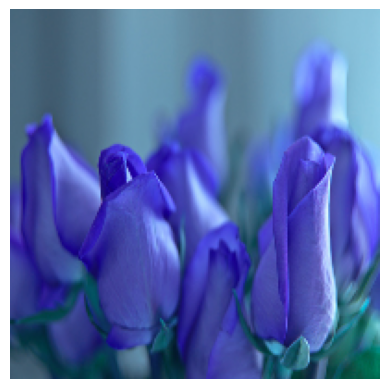

In [27]:
plt.axis('off')
plt.imshow(x[0])

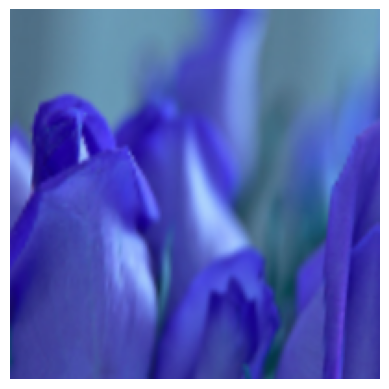

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [38]:
# After adding some regularization such as (Dropout,data_augmentation)
model = Sequential([
    data_augmentation,
    Conv2D(16,(3,3),padding = 'same',activation = 'relu',input_shape=(200,200,3)),
    MaxPooling2D(),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(units = 200,activation = 'relu'),
    Dense(units = 5,activation = 'linear')
])

In [39]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

In [40]:
model.fit(X_test_scaled,y_test,epochs = 40)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 792ms/step - accuracy: 0.2721 - loss: 1.7846
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 801ms/step - accuracy: 0.3610 - loss: 1.3626
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 799ms/step - accuracy: 0.4563 - loss: 1.2300
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 847ms/step - accuracy: 0.4869 - loss: 1.2303
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 810ms/step - accuracy: 0.5310 - loss: 1.1821
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 808ms/step - accuracy: 0.5029 - loss: 1.1443
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 813ms/step - accuracy: 0.5428 - loss: 1.0946
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 803ms/step - accuracy: 0.5583 - loss: 1.0705
Epoch 9/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 784ms/step - accuracy: 0.5780 - loss: 1.0301
Epoch 10/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 814ms/step - accuracy: 0.5922 - loss: 1.0144
Epoch 11/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 791ms/step - accuracy: 0.6107 - loss: 1.0617
Epoch 12/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 18

In [41]:
model.evaluate(X_test_scaled,y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.8407 - loss: 0.4159


[0.3925895392894745, 0.8558952212333679]

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step
Predicted label: sunflower


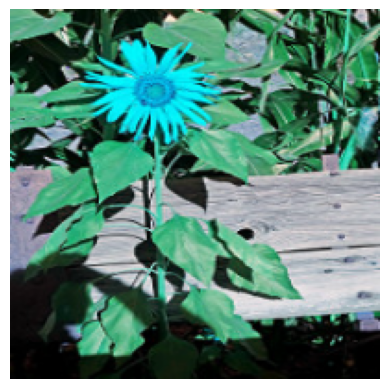

In [78]:
idx = random.randint(0,len(X_test_scaled))
plt.axis('off')
plt.imshow(X_test_scaled[idx])
y_predict = model.predict(X_test_scaled)
score =tf.nn.softmax(y_predict[idx])
predicted_index =  np.argmax(score)
predicted_label = [k for k, v in flowers_labels_dict.items() if v == predicted_index][0]

print("Predicted label:", predicted_label)

In [79]:
True_index = y_test[idx]
True_label = [k for k, v in flowers_labels_dict.items() if v == predicted_index][0]

print("True label:", True_label)

True label: sunflower
